# Partie 3: Feature Engineering et Feature Importance
- #### Affichage sous forme de barplot des Features Importantes 
- #### Expliquer votre selection de feature
### selectionner ma target et mes features avec SelectKBest
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# Importer SelectKBest and f_classif
from sklearn.feature_selection import SelectKBest,f_classif

In [39]:
# Importer notre nouveau dataset
df = pd.read_csv('./data/new_cancer.csv')
df.head()



,Unnamed: 0,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,0
1,1,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,1
2,2,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,2
3,3,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,2
4,4,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,2


In [40]:
# Drop Unnamed column
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [77]:

X=df.drop(['Level'], axis=1)
y=df['Level']

<AxesSubplot:xlabel='Score', ylabel='Feature'>

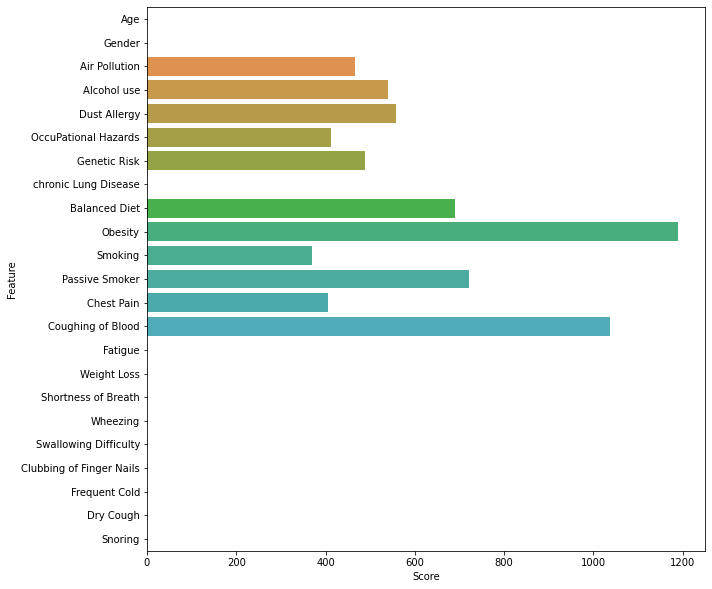

In [78]:
#k="all" c'est pour selectionner toutes les features
featuresHighestScores = SelectKBest(f_classif,k=3)

#Entrainer mes features pour obtenir le score de chaqu'une d'elle 
fit = featuresHighestScores.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)

#Selectionner que les features qui sont supérieur à la moyenne
df_scores_selected = df_scores[lambda x: x > df_scores.mean()]
df_columns = pd.DataFrame(X.columns)


# #concaténer les deux dataframes
df_features = pd.concat([df_columns,df_scores_selected],axis=1)
df_features.columns = ['Feature','Score']


fig, ax=plt.subplots(figsize=(10,10))
plt.xlabel("Score",   color='k')
plt.ylabel("Feature",  color='k')
sns.barplot(data=df_features, x='Score', y='Feature')


#### Maintenant que j'ai les features les plus intérésantes de mon dataset, je vais crée un nouveau dataset qui ne contiendra que ses features pour pouvoir ensuite entrainer un model de prédiction de niveau du cancer

#### Supprimer les features non selectionnées

In [79]:
df_features = df_features.dropna(axis=0)


### Créer un nouveau dataset avec les features selectionnées

In [80]:
features_tab  = list(df_features['Feature'])
features_tab.append('Level')

new_df = df[features_tab]
print('Ancien dataset ',df.shape)
print('Nouveau dataset avec les features les plus intérésantes ',new_df.shape)
print("Mon nouveau dataset contient {} colonnes tandis que l'ancien contenait {}".format(len(list(new_df.columns)),len(list(df.columns))))

Ancien dataset  (1000, 24)
Nouveau dataset avec les features les plus intérésantes  (1000, 12)
Mon nouveau dataset contient 12 colonnes tandis que l'ancien contenait 24


In [86]:
X = new_df.drop('Level',axis=1)
# X = df[["Dust Allergy","OccuPational Hazards","Genetic Risk","Obesity","Coughing of Blood"]]
y = new_df["Level"]

In [87]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [88]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

/home/djila/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [89]:
lsvc.score(X_train,y_train)

0.8014285714285714